# A not-so-serious introduction to modeling of surface processes
### Hillslope Diffusion

As geomorphologists we try to describe and explain the geomorphic features we see in the world around us.
But only describing is not useful in terms of making statements about the past and the possible future of a system, so we try to use very annoying things like equations and math in general to explain what is happening in the world around us.

The most simple way to start this task is the so-called 'hillslope diffusion' equation, which explains how sediment is transported down a hillslope by e.g soil creep, rainsplash, etc.. It is assumed that all those processes are in first-order driven by gravity and, like all diffusion processes, are driven by a 'Gradient'. If you think about what gradient in a landscape exists which directly links to gravity? Right, the elevation! So set up the equation.

First we write the equation for the amount of sediment which moves down a hillslope.

$q = -k_{diff} * \frac{dh}{dx}$ ; with q = sediment flux, k = diffusivity constant and dh/dx beeing the change in elevation = slope

Cool! Now we can calculate some value for q which gives us some value about some stuff that moves down some hill! Nice, isn't it?

q, the sediment flux [$\frac{m^3}{s}$] which tells us how many sediment moves down the slope at any point of the slope (at any value of x).

Now we want to know how much this value of q influences the actual elevation of a hillslope. For this we need to do something that we geomorphologists call a 'mass balance'. A mass balance basically describes "the mass which enters a system and the mass that leaves the system at any point in time" :

*** Input = Output + Accumulation ***

In our case we imagine something, we like to call a ***sandbox model***, only that we use theoretical sand (bits and bytes). When you are in holiday at a nice beach and somebody gives you the task to build up an cube in the sand, what expect you to be the problem? Right, the 'walls' of the cube are going to collapse, because they are not stable. But imagine you do it anyway, you go there, you build up you nice little cube and then you go away, have a beer and forget about it. The next day you come back and what you see is a hump. Your cube with nice flat sharp edges turned into a undefined hump of sand. Thats because it gets 'eroded' away, slowly but steady :
***
![alt text](SandCube.svg.png "Logo Title Text 1")
***
And because there is no sand appearing out of in thin air and raining down on our sandcube, we can assume that the elevation of this area depends on the velocity of sand traveling 'down the cube'. So there is no **Input** and the **Output** would be the sand traveling away from the cube. The model mass balance would look something like this:

The interesting thing about this sandcube for us would be to see how fast it is decaying. How long does it take until the cube got flat?
For this we need to write an equation in which the height of the cube depends on how long the cube is standing there:

$\frac{dh}{dt} = -\frac{dq}{dx} $, 

or in other words : elevation change with time *dh/dt* depends on the change of the sediment flux over time *dq/dt*, so the higher the sediment flux the faster our elevation will drop (the cube will be gone faster).

***
![alt text](SandCube_MassBalance.svg.png "Logo Title Text 1")
***

For this (honestly) very simple example of a mass balance we can think about 3 different scenarios and their outcomes:
1. Input > Output = The sandhump will grow
2. Input < Output = The sandhump will flatten out (our example case)
3. Input == Output = ? Good question. My Guess is that the sandhump will evolve in a specific shape and then just stay this way

One last problem with this stuff, before we start doing some cool plots and calculations (promise!) is this: Normally we don't have any fricking idea about $\frac{dq}{dx}$, so how fast the sediment travels somewhere else or down our sandcube. Those processes happen over such a long timescale and at such a slow rate, that it is nearly impossible to constrain for each landscape. So we could not use the last equation. Good thing is, at te beginning we introduced an equation for q! So, we just combine those two equationd and are ready to rumble: 

(1)  $q = -k_{diff} * \frac{dh}{dx}$

(2)  $\frac{dh}{dt} = -\frac{dq}{dx} $

(1) + (2) $\frac{dh}{dt} = k * \frac{d^2h}{dx^2}$


Note that the term on the right is the second-derivative of the topography, which mathematically resembles the curvature. Places with large negative curvature ('Hills') have high values of erosion whereas places with high positive erosion ('valleys') have high values of deposition:

![alt text](CurvaturePng.png "Logo Title Text 1")

So does this mean we can calculate the decay of our sandcube just with the help of the shape of our sandcube?

## So lets try to put this into python
### First we load a bunch of important modules that we need

In [139]:
#This loads some python moduels that we are going to need for calcs
#and plotting
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

### Now we 'build' a model. We define a few parameters which will define our initial assumptions and material constants

In [147]:
#Length of our area in m
Length  = 100 
#The spatial resolution (how often do we devide our area?)
dx      = 2./(Length-1)
#How long are we running our model? (in years)
T       = 3
#The temporal resolution of our model (How often do we calculate?)
dt      = dx**2/2
#Out of the maximum time and the timestepduration we get amount of timestep
n       = int(T/dt)
#Finally some geological! K is something thats called the 'diffusivity',
#it describes how effective mass moves through a system. (m^2/s)
K       = 0.01
#And because we have plate tectonics we assume some uplift in our area.
#What happens if you set this to zero?
uplift  = 0.0001       #uplift rate mm/y
#Width of our initial sandcube in m
cube_w  = 20
#Height of our initial sandcube in m
cube_h   = 2

### This kind of goes into the "meat" of python. Its not so important right now if you dont understand everything. We just "build" up our sandcube

/home/manu/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


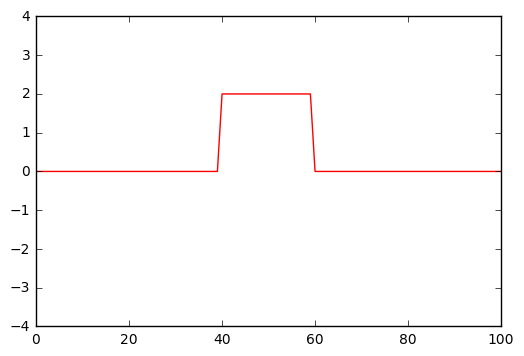

In [148]:
d   = np.linspace(0,Length,Length+1)  #create domain
h   = np.zeros(len(d))
h[len(h)/2-(cube_w/2):len(h)/2+(cube_w/2)]  += cube_h
fig1 = plt.figure('initial topography')
ax1  = plt.plot(d,h,'r')
yax1 = plt.ylim([-4,4])

In [142]:
hn = np.ones(Length)
for j in range(n):
    hn = h.copy()
    for i in range(1,Length-1):
        h[i] = hn[i] + K * dt / dx**2 * (hn[i+1] - 2 * hn[i] + hn[i-1])
    #h   += uplift #we neglect uplift right now. the beach is not moving
        

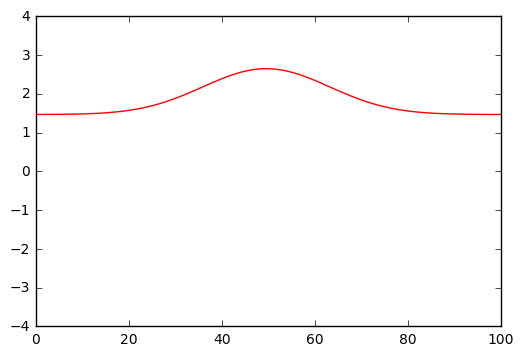

In [143]:
fig2 = plt.figure('resulting topography')
pl2  = plt.plot(d,h,'r')
yax2 = plt.ylim([-4,4])